<a href="https://colab.research.google.com/github/wuxmax/rl4abalone/blob/master/rl4abalone_colab_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [11]:
!pip install pyvirtualdisplay
!apt install xvfb
!pip install gym

Reading package lists... Done
Building dependency tree       
Reading state information... Done
xvfb is already the newest version (2:1.19.6-1ubuntu4.9).
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 34 not upgraded.


In [12]:
import os

# download segment_tree module
if not os.path.isfile('/content/segment_tree.py'):
  !wget https://raw.githubusercontent.com/curt-park/rainbow-is-all-you-need/master/segment_tree.py

# downlaod rainbow module
if not os.path.isfile('/content/rainbow.py'):
  !wget https://raw.githubusercontent.com/wuxmax/rl4abalone/master/rainbow.py

In [13]:
from pyvirtualdisplay import Display

In [14]:
# Start virtual display
dis = Display(visible=0, size=(400, 400))
dis.start()

In [15]:
!git clone https://github.com/towzeur/gym-abalone.git
%cd gym-abalone
!pip install -e .

import gym
from gym_abalone.envs import abalone_env

%cd ..

fatal: destination path 'gym-abalone' already exists and is not an empty directory.
/content/gym-abalone
Obtaining file:///content/gym-abalone
  Found existing installation: gym-abalone 0.0.1
    Can't uninstall 'gym-abalone'. No files were found to uninstall.
  Running setup.py develop for gym-abalone
/content


In [16]:
import random
import pickle

import gym
import torch
import numpy as np

from rainbow import DQNAgent

In [17]:
def seed_torch(seed):
    torch.manual_seed(seed)
    if torch.backends.cudnn.enabled:
        torch.backends.cudnn.benchmark = False
        torch.backends.cudnn.deterministic = True

In [18]:
AGENT_FILE_PATH: str = "rainbow-agent.pkl"
LOAD_FROM_FILE: bool = False
SAVE_TO_FILE: bool = True

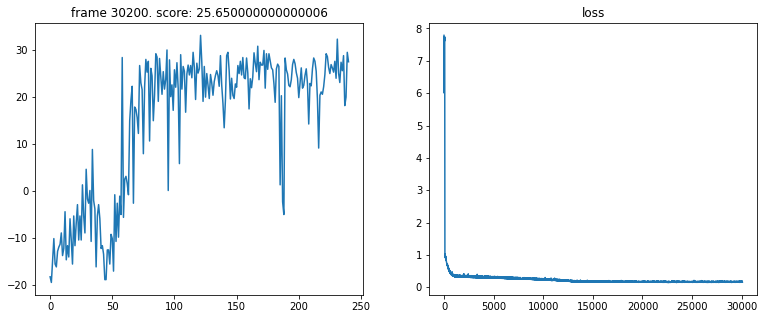

 15%|█▌        | 30350/200000 [1:52:44<10:22:31,  4.54it/s]

In [ ]:
env = gym.make("abalone-v0")

seed = 777

np.random.seed(seed)
random.seed(seed)
seed_torch(seed)
env.seed(seed)

num_frames = 200000
memory_size = 100000
batch_size = 128
target_update = 100

if not LOAD_FROM_FILE:
    agent = DQNAgent(env, memory_size, batch_size, target_update)
    agent.train(num_frames)

    if SAVE_TO_FILE:
        with open("rainbow-agent.pkl", "wb") as f:
            pickle.dump(agent, f)   
else:
    with open("rainbow-agent.pkl", "rb") as f:
      agent = pickle.load(f)

agent.test()

In [ ]:
!ls